<a href="https://colab.research.google.com/github/richa1288/pytorch/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Data Set 
# MNITST Handwritten. 28px by 28px from(0 to 9)
import torch
import torchvision   # library for computer vision in torch
from torchvision.datasets import MNIST

Download dataset from MNIST

In [6]:
dataset= MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
len(dataset)

60000

In [8]:
# dataset has 60,000 images for training. Other 10,000 images we can use as test.
test_dataset= MNIST(root='data/', train=False)
len(test_dataset)

10000

In [9]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA5DABD2C90>, 5)

In [10]:
import matplotlib.pyplot as plt


Label: 5


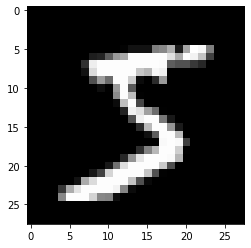

In [11]:
image, label=dataset[0]
plt.imshow(image, cmap='gray') # cmap is color map we fix it to gray as the images are in gray.
print('Label:', label)

In [12]:
# for pytorch we need to convert these images in tensors. for this we use ToTensfor transform during loading og dataset to convert images into PyTorch tensors

import torchvision.transforms as transforms

dataset= MNIST(root='data/', train= True, transform= transforms.ToTensor())



In [13]:
img_tensor, label= dataset[0]
print(img_tensor.shape, label)  # output first shows the channel RGB (channel 3) 1 for gray.

torch.Size([1, 28, 28]) 5


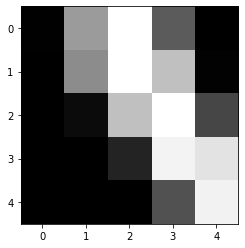

In [14]:
# to see part of image (10:15 height and 10:15 weight of gray image cmp=gray)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [15]:
# For training we have 60000 images. Lets split the images 10,000 for validation and remaining 50,000 for training
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [17]:
# Now using data loader load the dataset into batches
from torch.utils.data import DataLoader
#We set shuffle=True for the training data loader to ensure that the batches generated in each epoch are different.
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [18]:
# Model- Logistic Regression input*wights+bias
import torch.nn as nn
input_size= 28*28   # input-as the image is 28*28=784 
num_classes= 10     # output- 0 to 9 so vector size of10
# Logistic regression model
model = nn.Linear(input_size, num_classes)




In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0280,  0.0267, -0.0147,  ..., -0.0236,  0.0186,  0.0157],
        [-0.0037, -0.0074,  0.0214,  ...,  0.0039,  0.0278,  0.0155],
        [-0.0257,  0.0058, -0.0152,  ...,  0.0046,  0.0082,  0.0251],
        ...,
        [-0.0097,  0.0336, -0.0212,  ...,  0.0106,  0.0237, -0.0299],
        [ 0.0263, -0.0093,  0.0124,  ..., -0.0344,  0.0217,  0.0345],
        [-0.0063, -0.0129,  0.0255,  ...,  0.0192,  0.0076, -0.0287]],
       requires_grad=True)

In [20]:
print(model.bias.shape)

torch.Size([10])
